# Задачі регресії та класифікації з TensorFlow & Neural Networks

Цей notebook демонструє:
1. **Задачу регресії** - передбачення безперервних значень
2. **Задачу класифікації** - передбачення категорій

Обидві задачі використовують згенеровані дані та нейронні мережі на TensorFlow.

In [1]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

# Встановлення seed для відтворюваності результатів
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow версія: {tf.__version__}")

TensorFlow версія: 2.20.0


---
## Частина 1: Задача Регресії


In [2]:
def generate_regression_data(n_samples=1000, noise_level=0.1):
    X1 = np.random.uniform(-2, 2, n_samples)
    X2 = np.random.uniform(-2, 2, n_samples)

    y = 3 * X1**2 + 2 * X2 - 0.5 * X1 * X2 + 5

    noise = np.random.normal(0, noise_level * np.std(y), n_samples)
    y = y + noise

    X = np.column_stack([X1, X2])
    
    return X, y

X_reg, y_reg = generate_regression_data(n_samples=1000, noise_level=0.1)

print(f"Форма X: {X_reg.shape}")
print(f"Форма y: {y_reg.shape}")
print(f"\nСтатистика y:")
print(f"  Мінімум: {y_reg.min():.2f}")
print(f"  Максимум: {y_reg.max():.2f}")
print(f"  Середнє: {y_reg.mean():.2f}")
print(f"  Стандартне відхилення: {y_reg.std():.2f}")

Форма X: (1000, 2)
Форма y: (1000,)

Статистика y:
  Мінімум: 0.38
  Максимум: 22.19
  Середнє: 9.14
  Стандартне відхилення: 4.37


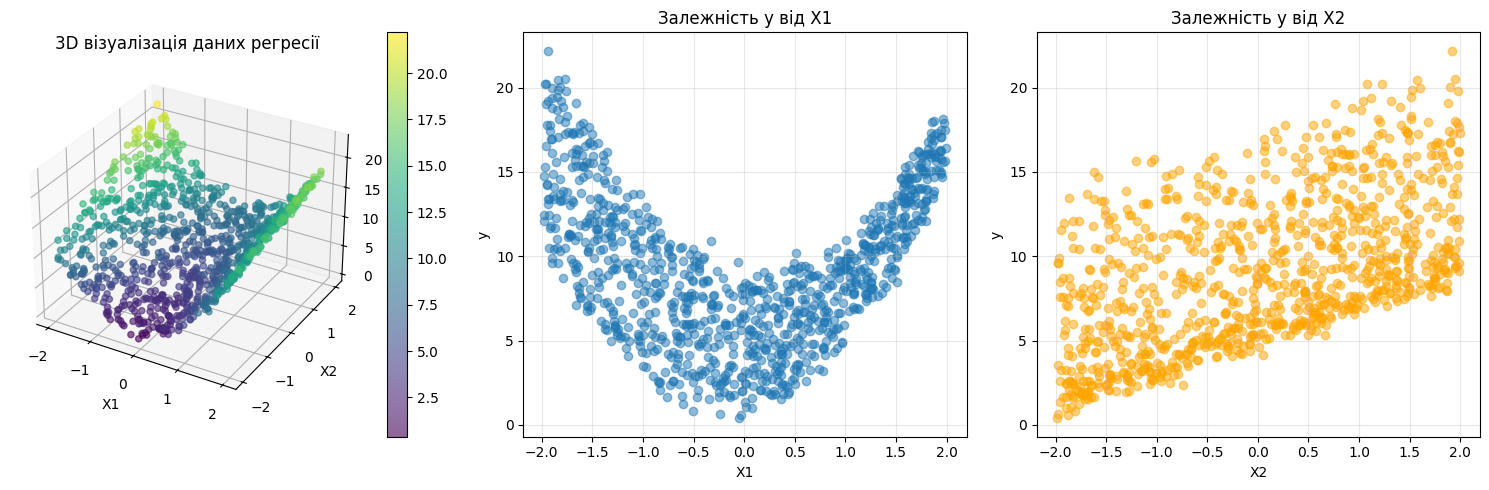

In [3]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(X_reg[:, 0], X_reg[:, 1], y_reg, c=y_reg, cmap='viridis', alpha=0.6)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('y')
ax1.set_title('3D візуалізація даних регресії')
plt.colorbar(scatter, ax=ax1)

ax2 = fig.add_subplot(132)
ax2.scatter(X_reg[:, 0], y_reg, alpha=0.5)
ax2.set_xlabel('X1')
ax2.set_ylabel('y')
ax2.set_title('Залежність y від X1')
ax2.grid(True, alpha=0.3)

ax3 = fig.add_subplot(133)
ax3.scatter(X_reg[:, 1], y_reg, alpha=0.5, color='orange')
ax3.set_xlabel('X2')
ax3.set_ylabel('y')
ax3.set_title('Залежність y від X2')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [4]:

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_X_reg = StandardScaler()
scaler_y_reg = StandardScaler()

X_train_reg_scaled = scaler_X_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_X_reg.transform(X_test_reg)

y_train_reg_scaled = scaler_y_reg.fit_transform(y_train_reg.reshape(-1, 1)).flatten()
y_test_reg_scaled = scaler_y_reg.transform(y_test_reg.reshape(-1, 1)).flatten()

print(f"Навчальна вибірка: {X_train_reg_scaled.shape[0]} зразків")
print(f"Тестова вибірка: {X_test_reg_scaled.shape[0]} зразків")

Навчальна вибірка: 800 зразків
Тестова вибірка: 200 зразків


In [5]:

def create_regression_model(input_dim):
   
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu', name='hidden_1'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu', name='hidden_2'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu', name='hidden_3'),
        layers.Dense(1, name='output')  
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',  
        metrics=['mae']  
    )
    
    return model

model_reg = create_regression_model(input_dim=2)
model_reg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

history_reg = model_reg.fit(
    X_train_reg_scaled, y_train_reg_scaled,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8135 - mae: 0.7504 - val_loss: 0.6078 - val_mae: 0.6662
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5814 - mae: 0.6557 - val_loss: 0.4065 - val_mae: 0.5518
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4063 - mae: 0.5376 - val_loss: 0.2791 - val_mae: 0.4588
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3252 - mae: 0.4804 - val_loss: 0.1850 - val_mae: 0.3679
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2719 - mae: 0.4284 - val_loss: 0.1317 - val_mae: 0.2964
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2161 - mae: 0.3710 - val_loss: 0.0915 - val_mae: 0.2466
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2093 - mae: 0.3591 - val_loss: 0.0732 - val_mae: 0.2182
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1497 - mae: 0.3062 - val_loss: 0.0569 - val_mae: 0.1864
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.13

In [7]:
y_pred_reg_scaled = model_reg.predict(X_test_reg_scaled)
y_pred_reg = scaler_y_reg.inverse_transform(y_pred_reg_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("="*50)
print("РЕЗУЛЬТАТИ РЕГРЕСІЇ")
print("="*50)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print("="*50)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
РЕЗУЛЬТАТИ РЕГРЕСІЇ
Mean Squared Error (MSE): 0.4624
Root Mean Squared Error (RMSE): 0.6800
Mean Absolute Error (MAE): 0.5172
R² Score: 0.9740


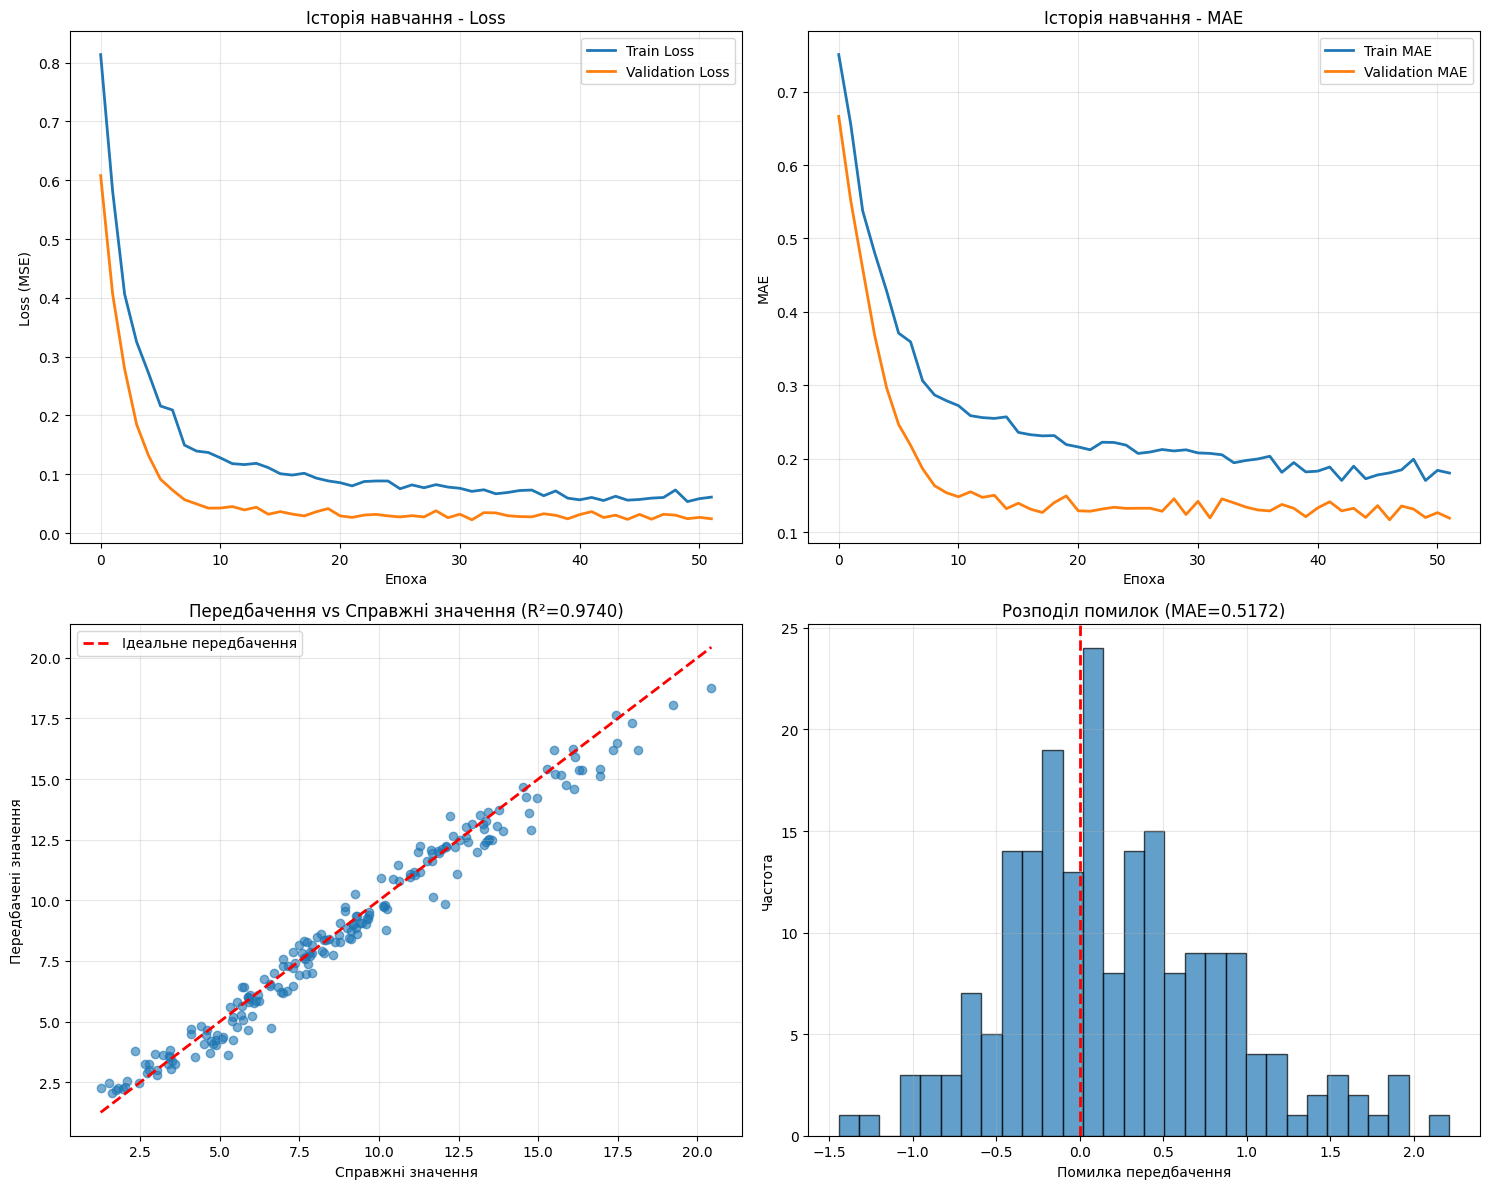

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].plot(history_reg.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history_reg.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Епоха')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].set_title('Історія навчання - Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history_reg.history['mae'], label='Train MAE', linewidth=2)
axes[0, 1].plot(history_reg.history['val_mae'], label='Validation MAE', linewidth=2)
axes[0, 1].set_xlabel('Епоха')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].set_title('Історія навчання - MAE')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(y_test_reg, y_pred_reg, alpha=0.6)
min_val = min(y_test_reg.min(), y_pred_reg.min())
max_val = max(y_test_reg.max(), y_pred_reg.max())
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ідеальне передбачення')
axes[1, 0].set_xlabel('Справжні значення')
axes[1, 0].set_ylabel('Передбачені значення')
axes[1, 0].set_title(f'Передбачення vs Справжні значення (R²={r2:.4f})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

errors = y_test_reg - y_pred_reg.flatten()
axes[1, 1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Помилка передбачення')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title(f'Розподіл помилок (MAE={mae:.4f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## Частина 2: Задача Класифікації


In [9]:
def generate_classification_data(n_samples=1000, n_classes=3):
  
    samples_per_class = n_samples // n_classes
    X_list = []
    y_list = []
    
    for class_idx in range(n_classes):
      
        if class_idx == 0:
            r = np.random.uniform(0, 1.5, samples_per_class)
            theta = np.random.uniform(0, 2*np.pi, samples_per_class)
            X1 = r * np.cos(theta)
            X2 = r * np.sin(theta)
        elif class_idx == 1:
            X1 = np.random.normal(3, 0.8, samples_per_class)
            X2 = np.random.normal(2, 0.8, samples_per_class)
        else:
            X1 = np.random.normal(-2, 0.7, samples_per_class)
            X2 = np.random.normal(3, 0.7, samples_per_class)
        
        X_class = np.column_stack([X1, X2])
        y_class = np.full(samples_per_class, class_idx)
        
        X_list.append(X_class)
        y_list.append(y_class)
    
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]
    
    return X, y

X_clf, y_clf = generate_classification_data(n_samples=1500, n_classes=3)

print(f"Форма X: {X_clf.shape}")
print(f"Форма y: {y_clf.shape}")
print(f"\nРозподіл класів:")
unique, counts = np.unique(y_clf, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Клас {cls}: {count} зразків ({count/len(y_clf)*100:.1f}%)")

Форма X: (1500, 2)
Форма y: (1500,)

Розподіл класів:
  Клас 0: 500 зразків (33.3%)
  Клас 1: 500 зразків (33.3%)
  Клас 2: 500 зразків (33.3%)


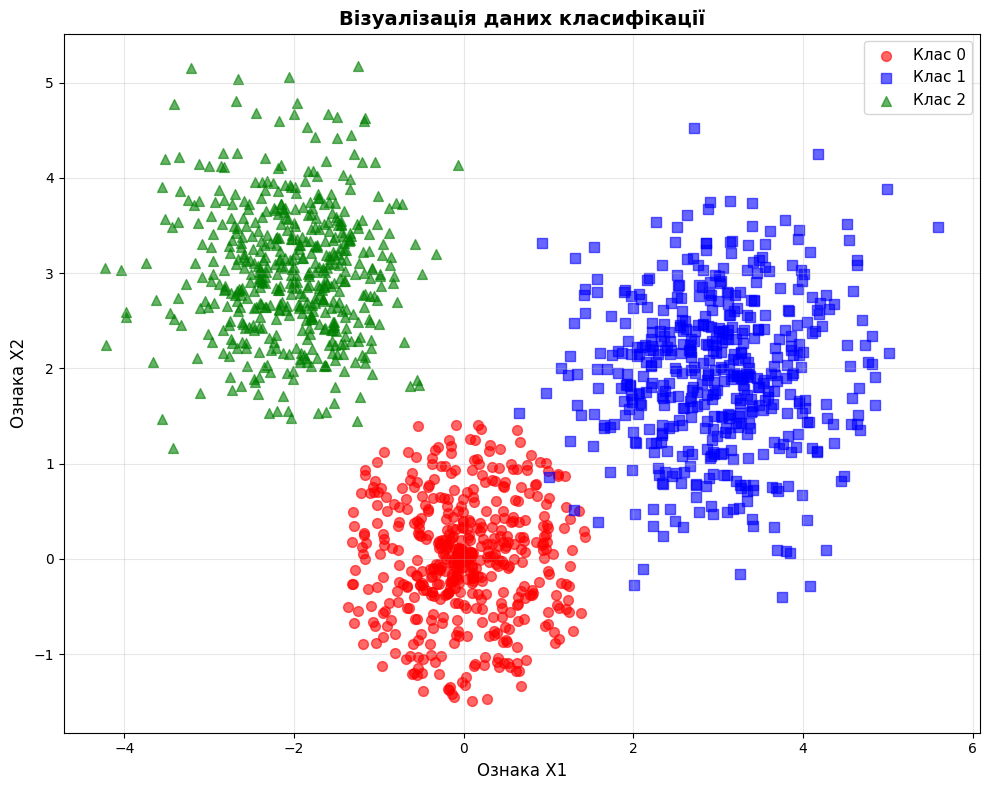

In [10]:
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

for class_idx in range(3):
    mask = y_clf == class_idx
    plt.scatter(X_clf[mask, 0], X_clf[mask, 1], 
               c=colors[class_idx], marker=markers[class_idx],
               label=f'Клас {class_idx}', alpha=0.6, s=50)

plt.xlabel('Ознака X1', fontsize=12)
plt.ylabel('Ознака X2', fontsize=12)
plt.title('Візуалізація даних класифікації', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

scaler_X_clf = StandardScaler()
X_train_clf_scaled = scaler_X_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_X_clf.transform(X_test_clf)

print(f"Навчальна вибірка: {X_train_clf_scaled.shape[0]} зразків")
print(f"Тестова вибірка: {X_test_clf_scaled.shape[0]} зразків")
print(f"\nРозподіл класів у навчальній вибірці:")
unique, counts = np.unique(y_train_clf, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Клас {cls}: {count} зразків")

Навчальна вибірка: 1200 зразків
Тестова вибірка: 300 зразків

Розподіл класів у навчальній вибірці:
  Клас 0: 400 зразків
  Клас 1: 400 зразків
  Клас 2: 400 зразків


In [12]:
def create_classification_model(input_dim, n_classes):
    
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation='relu', name='hidden_1'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu', name='hidden_2'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu', name='hidden_3'),
        layers.Dropout(0.2),
        layers.Dense(n_classes, activation='softmax', name='output')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',  
        metrics=['accuracy']
    )
    
    return model

model_clf = create_classification_model(input_dim=2, n_classes=3)
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,819 (42.26 KB)

 Trainable params: 10,819 (42.26 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stopping_clf = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

history_clf = model_clf.fit(
    X_train_clf_scaled, y_train_clf,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping_clf],
    verbose=1
)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8021 - loss: 0.8055 - val_accuracy: 0.9833 - val_loss: 0.3600
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9927 - loss: 0.1884 - val_accuracy: 0.9875 - val_loss: 0.0475
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9927 - loss: 0.0513 - val_accuracy: 0.9917 - val_loss: 0.0305
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9948 - loss: 0.0291 - val_accuracy: 0.9917 - val_loss: 0.0240
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9958 - loss: 0.0218 - val_accuracy: 0.9917 - val_loss: 0.0244
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9917 - val_loss: 0.0265
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9948 - loss: 0.0162 - val_accuracy: 0.9917 - val_loss: 0.0286
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9948 - loss: 0.0199 - val_accuracy: 0.9917 - 

In [14]:
y_pred_clf_proba = model_clf.predict(X_test_clf_scaled)
y_pred_clf = np.argmax(y_pred_clf_proba, axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print("="*50)
print("РЕЗУЛЬТАТИ КЛАСИФІКАЦІЇ")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("="*50)
print("\nДетальний звіт по класах:")
print(classification_report(y_test_clf, y_pred_clf, target_names=[f'Клас {i}' for i in range(3)]))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
РЕЗУЛЬТАТИ КЛАСИФІКАЦІЇ
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Детальний звіт по класах:
              precision    recall  f1-score   support

      Клас 0       1.00      1.00      1.00       100
      Клас 1       1.00      1.00      1.00       100
      Клас 2       1.00      1.00      1.00       100

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



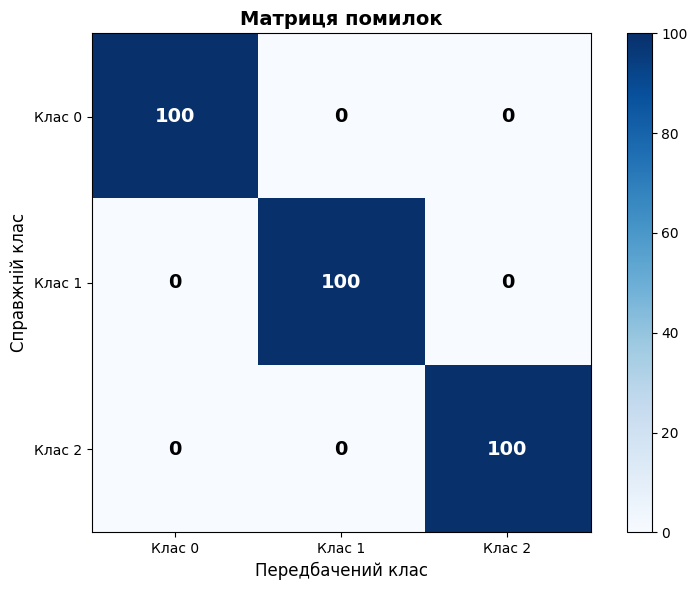

In [15]:
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матриця помилок', fontsize=14, fontweight='bold')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, [f'Клас {i}' for i in range(3)])
plt.yticks(tick_marks, [f'Клас {i}' for i in range(3)])

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black",
             fontsize=14, fontweight='bold')

plt.ylabel('Справжній клас', fontsize=12)
plt.xlabel('Передбачений клас', fontsize=12)
plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


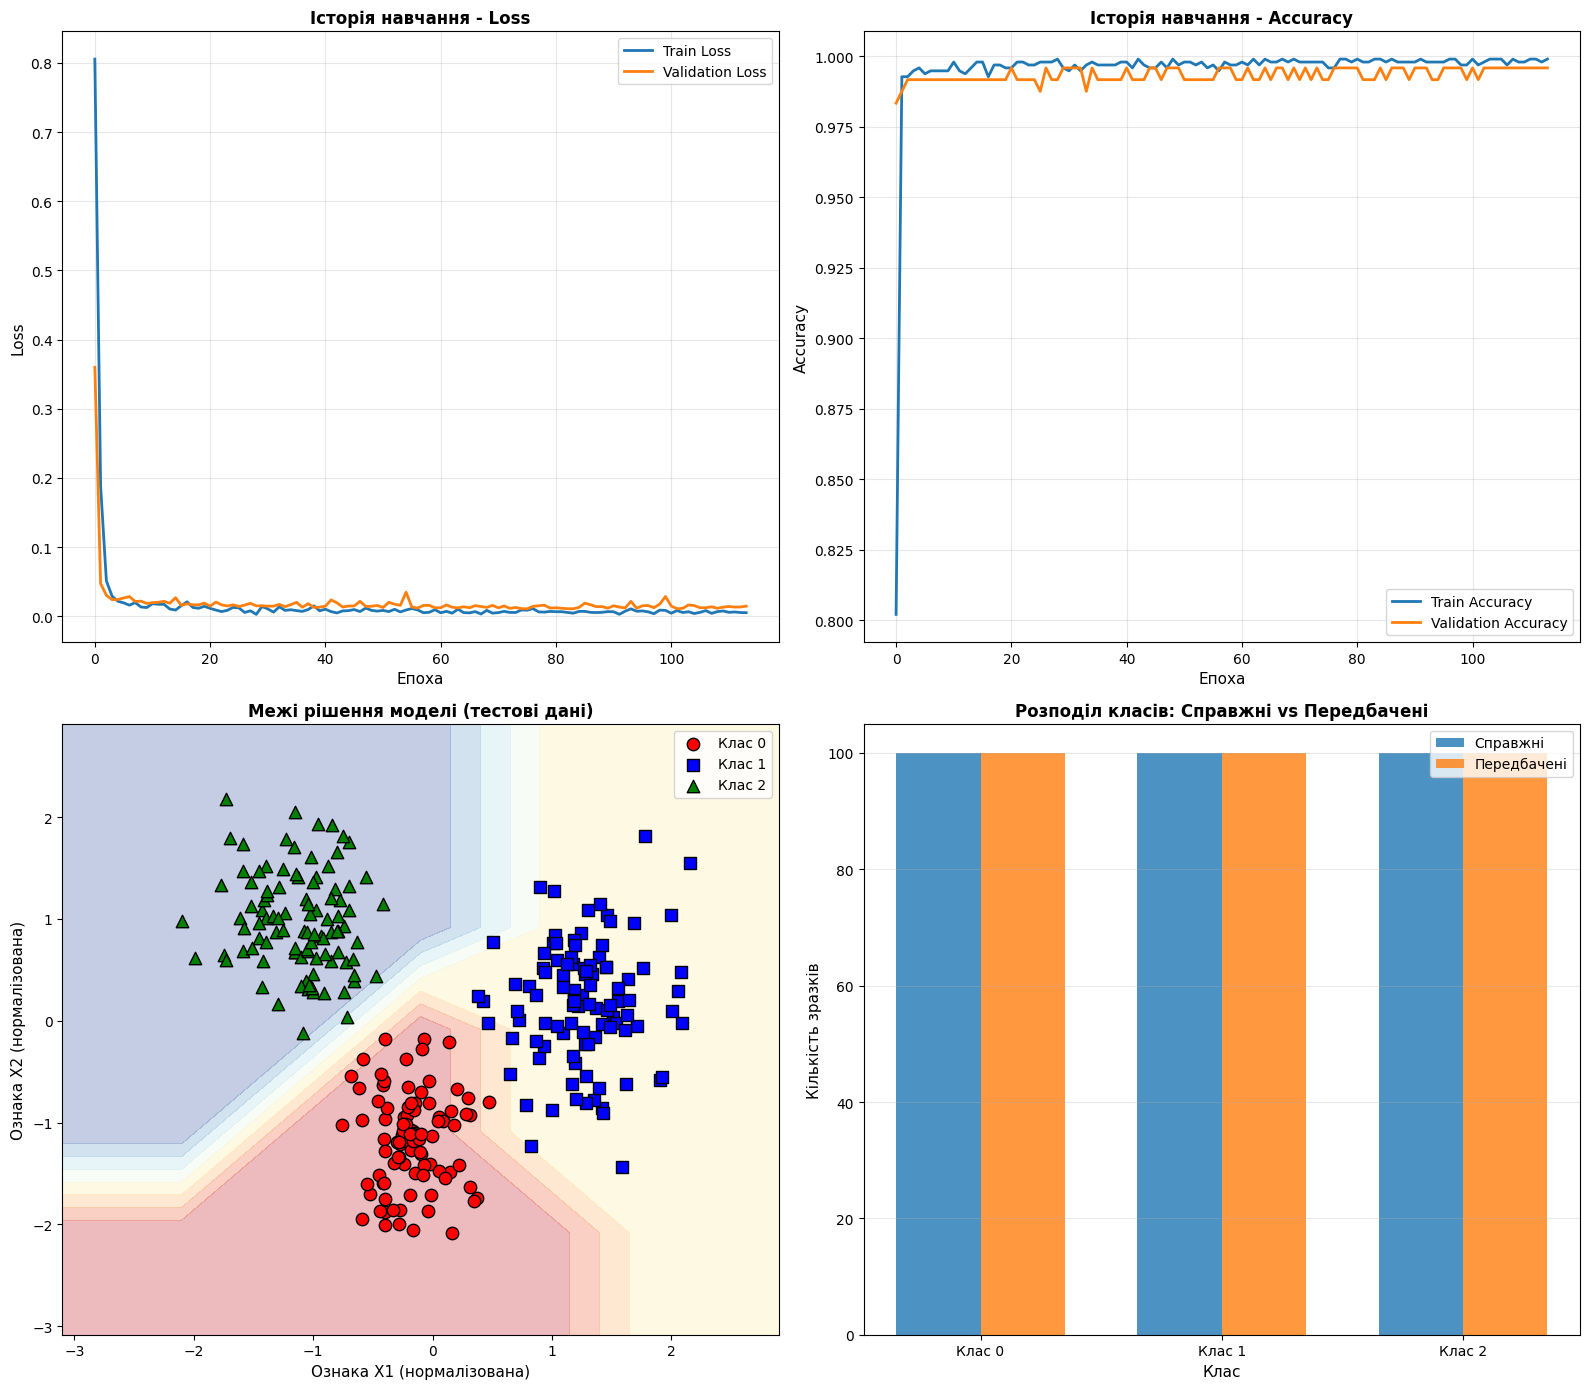

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

axes[0, 0].plot(history_clf.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(history_clf.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Епоха', fontsize=11)
axes[0, 0].set_ylabel('Loss', fontsize=11)
axes[0, 0].set_title('Історія навчання - Loss', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history_clf.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 1].plot(history_clf.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0, 1].set_xlabel('Епоха', fontsize=11)
axes[0, 1].set_ylabel('Accuracy', fontsize=11)
axes[0, 1].set_title('Історія навчання - Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)


x_min, x_max = X_test_clf_scaled[:, 0].min() - 1, X_test_clf_scaled[:, 0].max() + 1
y_min, y_max = X_test_clf_scaled[:, 1].min() - 1, X_test_clf_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

Z = model_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

axes[1, 0].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
for class_idx in range(3):
    mask = y_test_clf == class_idx
    axes[1, 0].scatter(X_test_clf_scaled[mask, 0], X_test_clf_scaled[mask, 1],
                      c=colors[class_idx], marker=markers[class_idx],
                      label=f'Клас {class_idx}', edgecolors='black', s=80)

axes[1, 0].set_xlabel('Ознака X1 (нормалізована)', fontsize=11)
axes[1, 0].set_ylabel('Ознака X2 (нормалізована)', fontsize=11)
axes[1, 0].set_title('Межі рішення моделі (тестові дані)', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)

comparison_data = []
for class_idx in range(3):
    true_count = np.sum(y_test_clf == class_idx)
    pred_count = np.sum(y_pred_clf == class_idx)
    comparison_data.append([true_count, pred_count])

x_pos = np.arange(3)
width = 0.35
axes[1, 1].bar(x_pos - width/2, [d[0] for d in comparison_data], width, label='Справжні', alpha=0.8)
axes[1, 1].bar(x_pos + width/2, [d[1] for d in comparison_data], width, label='Передбачені', alpha=0.8)
axes[1, 1].set_xlabel('Клас', fontsize=11)
axes[1, 1].set_ylabel('Кількість зразків', fontsize=11)
axes[1, 1].set_title('Розподіл класів: Справжні vs Передбачені', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([f'Клас {i}' for i in range(3)])
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()